In [1]:
import sys
sys.path.insert(0, '../../source')
sys.path.insert(0, '../../source/miq')
sys.path.insert(0, '../../source/maskrcnn')
sys.path.append('../../source/dataset')
sys.path.append('C:\\Program Files\\Micro-Manager-2.0beta')

import MMCorePy

mmc = MMCorePy.CMMCore()
mmc.loadSystemConfiguration("../../../config/scope_stage.cfg")
mmc.setFocusDevice("FocusDrive")
print ("Devices loaded from config file:\n", mmc.getLoadedDevices())
print ("\n Stage at: (", mmc.getXPosition(), ",", mmc.getYPosition(), ")")


Devices loaded from config file:
 ('COM5', 'COM4', 'Scope', 'FocusDrive', 'XYStage', 'Core')

 Stage at: ( -271.9 , -8921.1 )


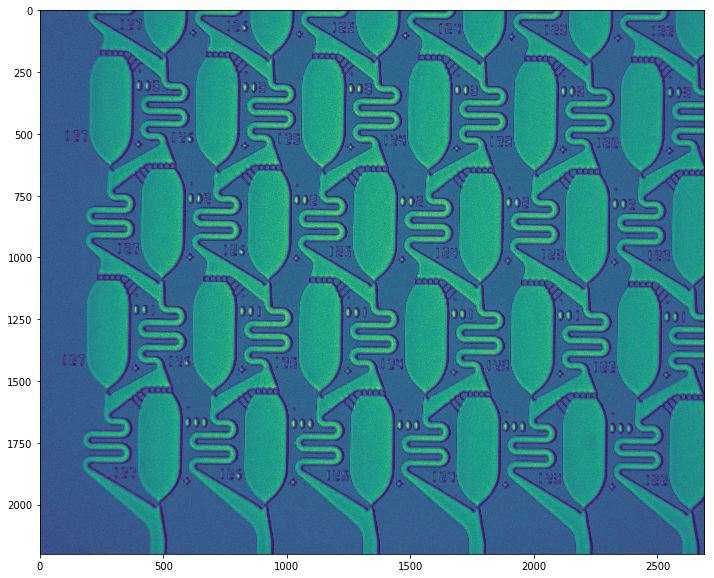

In [6]:
import sc_utils
import numpy as np

cam = sc_utils.start_cam()
frame = cam.get_frame(exp_time=1)#.reshape(cam.sensor_size[::-1])
frame = np.flipud(frame)
sc_utils.close_cam(cam)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.imshow(frame)

In [2]:
import alignment
model = alignment.get_inference_model(model_dir="../")
centroids, orig_frame, frame, r = alignment.find_alignment_mark(model)
alignment.move_to_center(mmc, centroids)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Loading weights from  ../alignment_30.h5
(2200, 2688)
Processing 1 images
image                    shape: (2200, 2688, 3)       min:   16.00000  max:   64.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -39.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2688.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [4]:
import position as pos
aligned_x, aligned_y, _ = pos.current(mmc) 

In [5]:
pos.set_pos(mmc, x=aligned_x-1116.8, y=aligned_y-266)

In [9]:
pos.set_pos(mmc, x=mmc.getXPosition()-24494.4, y=mmc.getYPosition())

In [5]:
pos.set_pos(mmc, x=-7544.808346401553, y=-96.40744501426265, z=7077.538868965517)

In [15]:
import tensorflow

In [1]:
class Test:
    NUMBER = 3
    WORD = 'hello'
    def init(self):
        self.number = 9
        self.hello = 'hi'
        print(self.WORD + "hello")
    print(NUMBER)

class Two(Test):
    NUMBER = 10
    print(NUMBER)

3
10


In [6]:
Two.WORD

'hello'

In [7]:
Test.NUMBER

3

In [3]:
test = Test()
# test.NUMBER

In [4]:
test.init()
test.number

hellohello


9